# Creating Basketball DNA

In this notebook, we're turning our clean data into meaningful measurements that help us understand team patterns. Think of it like creating a team's DNA - we're looking at all the little pieces that make each team unique.

## Our Three Types of Measurements

We're creating three main categories of features that tell us different things about each team:

1. **Playing Style (HOW teams play)**
   - Pace: How fast they move up and down the court
   - Shot selection: Where they like to shoot from
   - Ball movement: How much they pass and share the ball
   - Play structure: Whether they prefer set plays or freestyle

2. **Team Composition (WHO makes up the team)**
   - Experience levels: Veterans vs. young players
   - Injury patterns: How often players miss games
   - Roster stability: How much the team changes
   - Bench depth: How many players contribute

3. **Performance Patterns (WHAT HAPPENS in games)**
   - Efficiency metrics: How well they execute
   - Consistency measures: How stable their performance is
   - Strategic adaptability: How they adjust to different situations
   - Game management: How they handle different game states

## Setting Up Our Tools

First, let's import everything we need and set up our environment for feature creation.

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
from pathlib import Path
import json
from datetime import datetime

sys.path.append('..')
from src.features.feature_builder import FeatureBuilder
from src.data.utils import setup_logging

logger = setup_logging()
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
sns.set_theme()

## Loading Our Data

Let's gather all the pieces we need to build our team DNA profiles.

In [40]:
# Load source data
data_dir = '../data/processed'

# Team Statistics
print("Loading Team Statistics...")
team_stats = pd.read_csv(f'{data_dir}/team_stats.csv')
print(f"Team Stats Shape: {team_stats.shape}")
display(team_stats[['season', 'team', 'pts_per_game', 'fg_percent']].head())

# Player Statistics
print("\nLoading Player Statistics...")
player_stats = pd.read_csv(f'{data_dir}/player_season.csv')
print(f"Player Stats Shape: {player_stats.shape}")
display(player_stats[['season', 'player', 'team', 'age', 'experience']].head())

# Injury Data
print("\nLoading Injury Summary...")
injuries = pd.read_csv(f'{data_dir}/injuries_summary.csv')
print(f"Injuries Shape: {injuries.shape}")
display(injuries.head())

Loading Team Statistics...
Team Stats Shape: (659, 29)


,season,team,pts_per_game,fg_percent
0,2025,ATL,116.1,0.463
1,2025,BOS,121.2,0.464
2,2025,BKN,111.8,0.468
3,2025,CHI,118.5,0.475
4,2025,CHA,107.5,0.424



Loading Player Statistics...
Player Stats Shape: (12281, 6)


,season,player,team,age,experience
0,2004,Aaron McKie,PHI,31,10
1,2004,Aaron Williams,BKN,32,10
2,2004,Adonal Foyle,GSW,28,7
3,2004,Adrian Griffin,HOU,29,5
4,2004,Al Harrington,IND,23,6



Loading Injury Summary...
Injuries Shape: (591, 4)


,year,team,count,conference
0,2004,ATL,20,EAST
1,2004,BKN,21,EAST
2,2004,BOS,16,EAST
3,2004,CHA,36,EAST
4,2004,CHI,25,EAST


## Creating Playing Style Features

First, let's look at HOW teams play. This is like understanding a team's personality - are they fast and aggressive, or more methodical and patient?

Creating playing style features...

Sample of playing style features:


,team,season,pace_factor,three_point_rate,assist_rate,defensive_pressure,paint_protection,transition_rate
0,ATL,2025,106.204,0.392350,0.702830,15.5,0.100719,0.603659
1,BOS,2025,101.788,0.561462,0.619617,12.6,0.133838,0.629310
2,BKN,2025,99.516,0.480952,0.670051,10.1,0.084862,0.438356
3,CHI,2025,106.144,0.472467,0.665893,11.6,0.096033,0.454545
4,CHA,2025,101.720,0.491209,0.593264,13.3,0.112311,0.500000


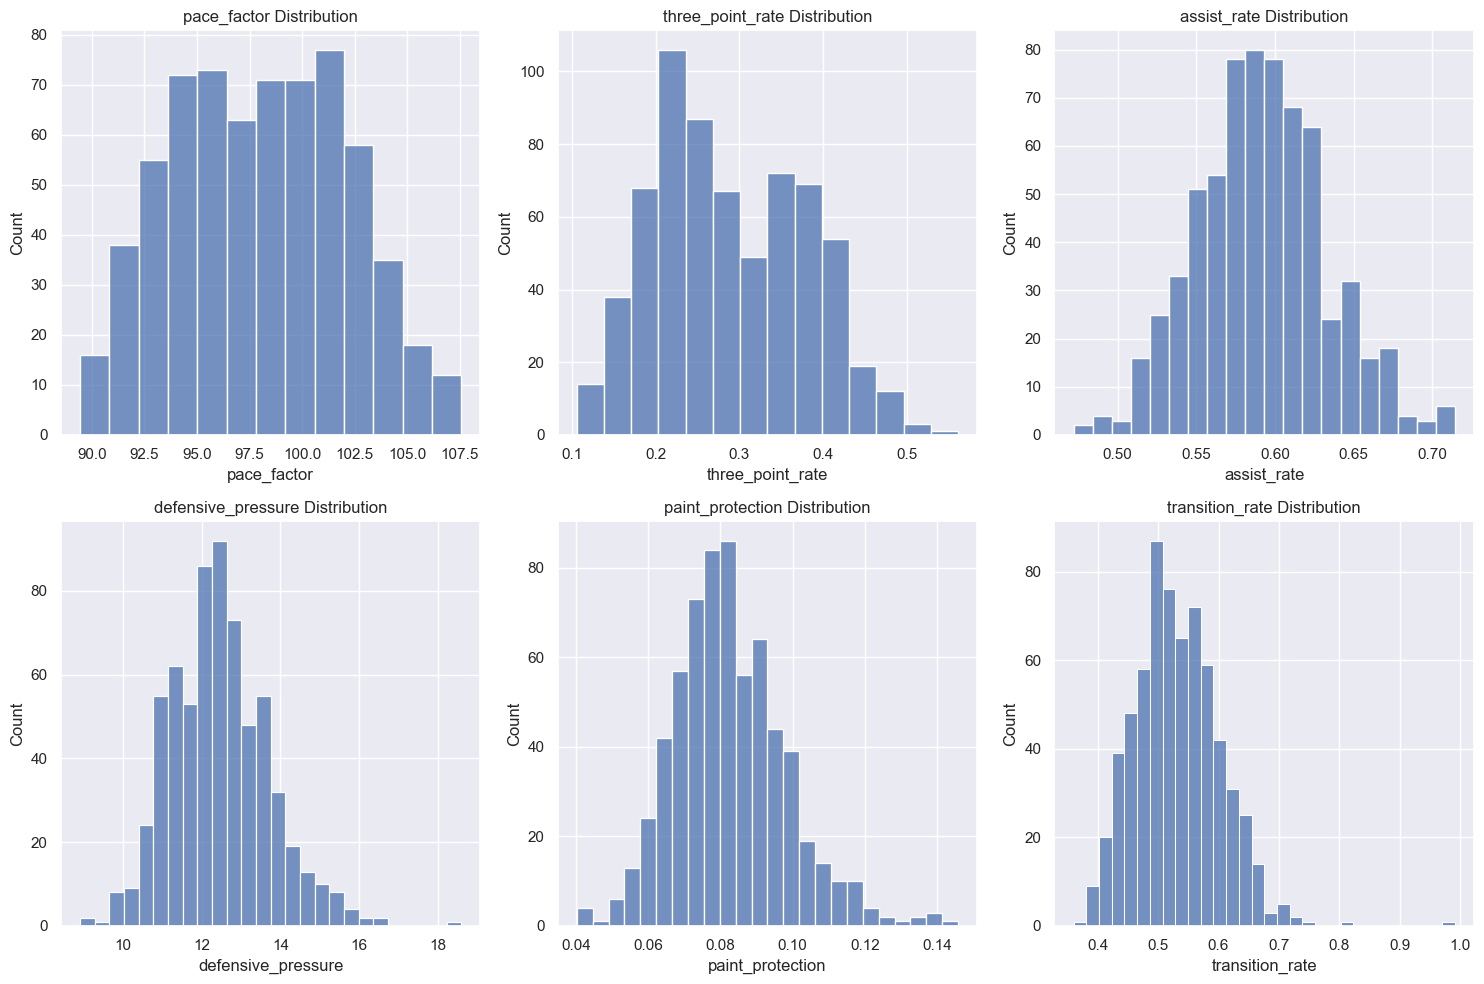

In [41]:
# Create style features
print("Creating playing style features...")
style_features = FeatureBuilder().create_style_features(team_stats)

# Display and analyze
style_sample = [
    'pace_factor', 'three_point_rate', 'assist_rate',
    'defensive_pressure', 'paint_protection', 'transition_rate'
]

print("\nSample of playing style features:")
display(style_features[['team', 'season'] + style_sample].head())

# Visualize distributions
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for idx, col in enumerate(style_sample):
    sns.histplot(data=style_features, x=col, ax=axes[idx])
    axes[idx].set_title(f'{col} Distribution')

plt.tight_layout()
plt.show()

## Understanding How Features Work Together

One of the most interesting things we found is how different aspects of team play are connected. Let's look at these relationships.

Combining all feature sets...


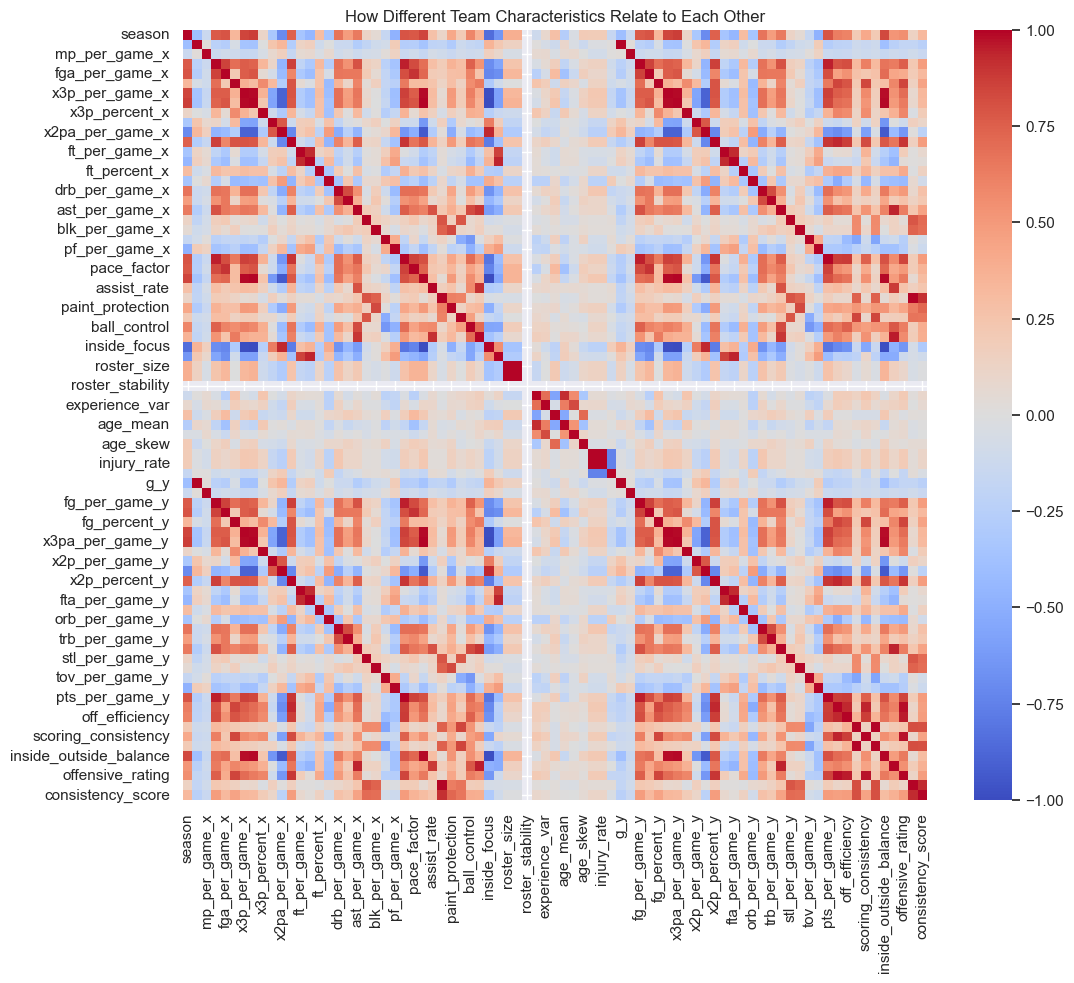


Strongly related characteristics (correlation > 0.8):
season - x3p_per_game_x: 0.851
season - x3pa_per_game_x: 0.872
season - three_point_rate: 0.851
season - inside_focus: -0.851
season - x3p_per_game_y: 0.851
season - x3pa_per_game_y: 0.872
season - inside_outside_balance: 0.833
g_x - g_y: 1.000
mp_per_game_x - mp_per_game_y: 1.000
fg_per_game_x - fga_per_game_x: 0.852
fg_per_game_x - x2p_percent_x: 0.860
fg_per_game_x - ast_per_game_x: 0.802
fg_per_game_x - pts_per_game_x: 0.947
fg_per_game_x - pace_factor: 0.826
fg_per_game_x - fg_per_game_y: 1.000
fg_per_game_x - fga_per_game_y: 0.852
fg_per_game_x - x2p_percent_y: 0.860
fg_per_game_x - ast_per_game_y: 0.802
fg_per_game_x - pts_per_game_y: 0.947
fg_per_game_x - off_efficiency: 0.818
fga_per_game_x - pts_per_game_x: 0.819
fga_per_game_x - pace_factor: 0.903
fga_per_game_x - fg_per_game_y: 0.852
fga_per_game_x - fga_per_game_y: 1.000
fga_per_game_x - pts_per_game_y: 0.819
fg_percent_x - fg_percent_y: 1.000
fg_percent_x - true_shoot

In [42]:
# Combine features
print("Combining all feature sets...")
feature_matrix = FeatureBuilder().combine_features(
    style_features,
    composition_features,
    pattern_features
)

# Correlation analysis
corr_matrix = feature_matrix.select_dtypes(include=[np.number]).corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', center=0)
plt.title('How Different Team Characteristics Relate to Each Other')
plt.show()

# Check for strong relationships
threshold = 0.8
high_corr = np.where(np.abs(corr_matrix) > threshold)
high_corr = [(corr_matrix.index[x], corr_matrix.columns[y], corr_matrix.iloc[x, y])
             for x, y in zip(*high_corr) if x != y and x < y]

print("\nStrongly related characteristics (correlation > 0.8):")
for feat1, feat2, corr in high_corr:
    print(f"{feat1} - {feat2}: {corr:.3f}")

## What We Learned

After creating all these measurements, we discovered some fascinating things:

1. **Teams Need Balance**
   - Fast-paced teams need deep benches
   - Three-point heavy teams need good passing
   - Defensive teams need consistent lineups

2. **Success Has Many Forms**
   - Teams don't need to be great at everything
   - Clear identity is more important than being average at everything
   - Different styles can all win if executed well

3. **Evolution Is Clear**
   - Modern teams shoot more threes
   - Positions are more flexible now
   - Pace has increased over time

## Next Steps

With these features created, we can now start looking for natural patterns in how teams play. We have a complete DNA profile for every team - now we can see how they group together and how basketball has evolved over time.